In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data
https://fred.stlouisfed.org/series/S4248SM144NCEN

In [2]:
df = pd.read_csv('Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
df.columns = ['Sales']

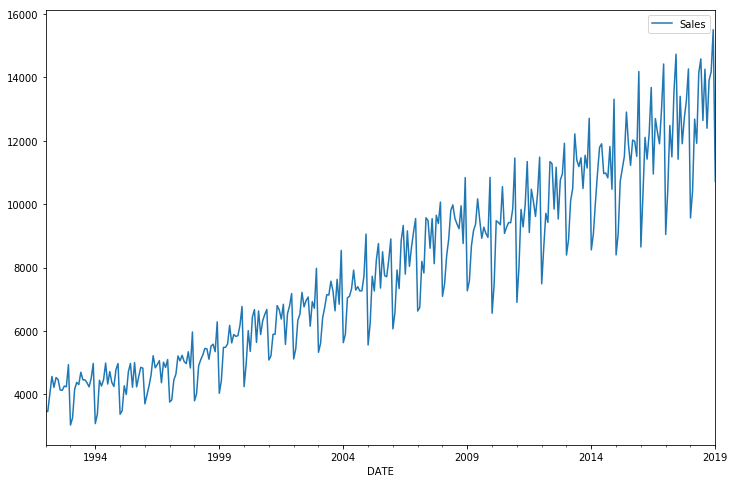

In [5]:
df.plot(figsize=(12,8))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

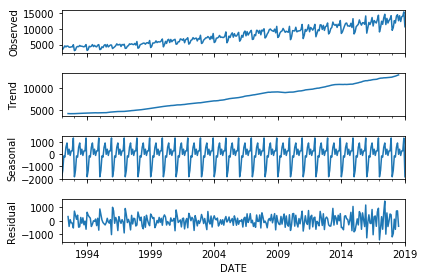

In [7]:
results = seasonal_decompose(df['Sales'])
results.plot();

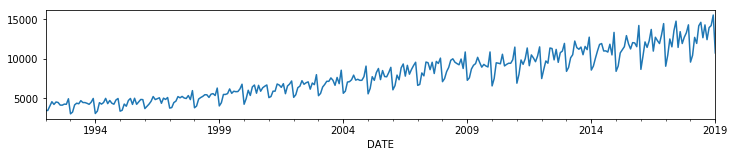

In [8]:
results.observed.plot(figsize=(12,2))

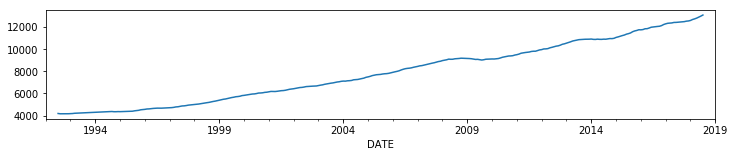

In [9]:
results.trend.plot(figsize=(12,2))

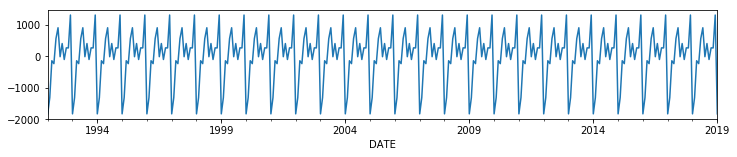

In [10]:
results.seasonal.plot(figsize=(12,2))

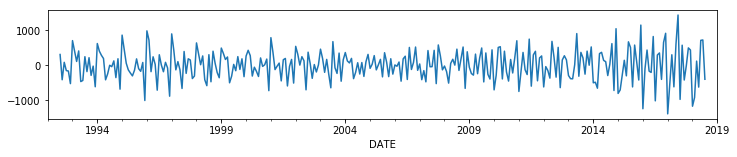

In [11]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [12]:
len(df)

325

In [13]:
325-12

313

In [14]:
train = df.iloc[:313]
test = df.iloc[313:]

In [15]:
len(test)

12

## Scale Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator
#takes a sequence of data-points gathered at equal intervals, along with time series parameters (such as length of history) to produce batches for training/validation.

Using TensorFlow backend.


In [21]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [22]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(data = scaled_train, targets = scaled_train, length=n_input, batch_size=1)

#data and target is same because we are taking the 2 data points (n_input = 2) from the same source and predicts its 3rd data point.
#data: Indexable generator containing consecutive data points (timesteps). The data should be at 2D, and axis 0 is expected to be the time dimension.
#targets: Targets corresponding to timesteps in `data`. It should have same length as `data`.
#batch_size is size of input at a time to NN and size of output from NN. 
#Small batch size leads to better training of NN but it takes longer time to complete training.


In [23]:
len(scaled_train)

313

In [24]:
len(generator) # n_input = 2

311

In [25]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [26]:
# What does the first batch look like?
X,y = generator[0]

In [27]:
generator[0]

(array([[[0.03658432],
         [0.03649885]]]), array([[0.08299855]]))

In [28]:
X.shape    #this formatting or shape is required to feed as an input to neural network
           #it will take lot of effort to format the NN input using numpy, that's why we use TimeseriesGenerator

(1, 2, 1)

In [29]:
y.shape

(1, 1)

In [30]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885]
Predict this y: 
 [[0.08299855]]


In [31]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [32]:
# What does the first batch look like?
X,y = generator[0]

In [33]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


### Create the Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [35]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [37]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
301/301 [==============================] - 7s 23ms/step - loss: 0.0215
Epoch 2/50
301/301 [==============================] - 6s 19ms/step - loss: 0.0099
Epoch 3/50
301/301 [==============================] - 6s 19ms/step - loss: 0.0090
Epoch 4/50
301/301 [==============================] - 6s 19ms/step - loss: 0.0088
Epoch 5/50
301/301 [==============================] - 6s 19ms/step - loss: 0.0089
Epoch 6/50
301/301 [==============================] - 6s 18ms/step - loss: 0.0068
Epoch 7/50
301/301 [==============================] - 6s 18ms/step - loss: 0.0063
Epoch 8/50
301/301 [==============================] - 6s 18ms/step - loss: 0.0053
Epoch 9/50
301/301 [==============================] - 6s 20ms/step - loss: 0.0041
Epoch 10/50
301/301 [==============================] - 6s 20ms/step - loss: 0.0033
Epoch 11/50
301/301 [==============================] - 5s 18ms/step - loss: 0.0029
Epoch 12/50
301/301 [==============================] - 5s 18ms/step - loss: 0.0022
Epoch 13/50
3

In [38]:
model.history.history.keys()

dict_keys(['loss'])

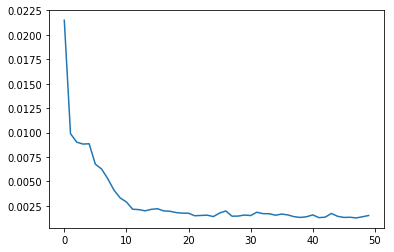

In [39]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

Take last 12 data points from training data and predict 13th data point (which will be the 1st data point of test data).
Compare the predicted data point with test data point.

In [40]:
first_eval_batch = scaled_train[-12:]

In [41]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [42]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [43]:
model.predict(first_eval_batch)  #predicted data

array([[0.7278314]], dtype=float32)

In [44]:
scaled_test[0]                  #Actual data (present in test)

array([0.63116506])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [45]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]    #n_input = 12
current_batch = first_eval_batch.reshape((1, n_input, n_features))    #n_features = 1

In [46]:
current_batch.shape

(1, 12, 1)

In [47]:
current_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [48]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80776135],
        [ 0.72313873],
        [ 0.89870929],
        [ 1.        ],
        [ 0.71672793],
        [ 0.88648602],
        [ 0.75869732],
        [ 0.82742115],
        [ 0.87443371],
        [ 0.96025301],
        [ 0.5584238 ],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. PLEASE ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [49]:
test_predictions = []   #to store prediction

first_eval_batch = scaled_train[-n_input:]  #last n_input from training set
current_batch = first_eval_batch.reshape((1, n_input, n_features))  #reshape this to the format RNN wants (same format as TimeseriesGenerator)

#How far in the future we wanna predict ie. len(test) which is 12. Later compare the predicted data with test data
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the predicted number instead of [array])
    #current_pred without slicing looks like for example array([[0.72443914]], dtype=float32) and after slicing array([0.72443914], dtype=float32)
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction ie. drop first value and add predicted value in the end
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [50]:
test_predictions

[array([0.7278314], dtype=float32),
 array([0.86550635], dtype=float32),
 array([0.8051566], dtype=float32),
 array([0.97336763], dtype=float32),
 array([1.0461324], dtype=float32),
 array([0.7946152], dtype=float32),
 array([0.96113193], dtype=float32),
 array([0.81946677], dtype=float32),
 array([0.90523195], dtype=float32),
 array([0.94138473], dtype=float32),
 array([1.0197828], dtype=float32),
 array([0.6398806], dtype=float32)]

In [51]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

## Inverse Transformations and Compare

In [52]:
true_predictions = scaler.inverse_transform(test_predictions)

In [53]:
true_predictions

array([[11545.89982098],
       [13156.55880028],
       [12450.5269295 ],
       [14418.42792016],
       [15269.70347798],
       [12327.20333129],
       [14275.28245318],
       [12617.94173867],
       [13621.30861425],
       [14044.25998813],
       [14961.43876195],
       [10516.96311122]])

In [54]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [55]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

In [56]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11545.899821
2018-03-01,12683,13156.558800
2018-04-01,11919,12450.526929
2018-05-01,14138,14418.427920
2018-06-01,14583,15269.703478
2018-07-01,12640,12327.203331
2018-08-01,14257,14275.282453
2018-09-01,12396,12617.941739
2018-10-01,13914,13621.308614


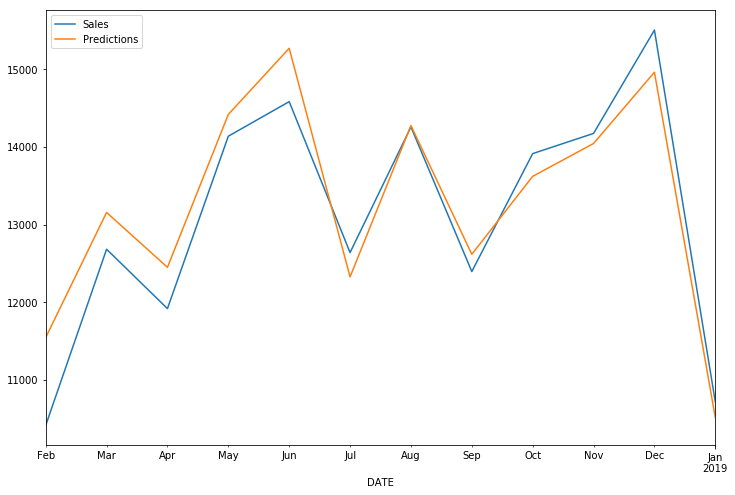

In [57]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [58]:
model.save('my_rnn_model.h5')

## load a model

In [59]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [60]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
